# Analysis on Transfer Learning

In [51]:
import csv
import numpy as np
import sklearn
import skimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from google.colab import drive

# SPECIFY MAPPING,
MAPPING = "DMP-T"
UNITS = r"K"
#UNITS = r"$h^2\,\mathrm{Mpc}^{-3}$"
CONTROL_MODEL = "EX1-C"
TRANSFER_MODEL = "EX1"

# Model Training Analysis


Mounted at /content/drive


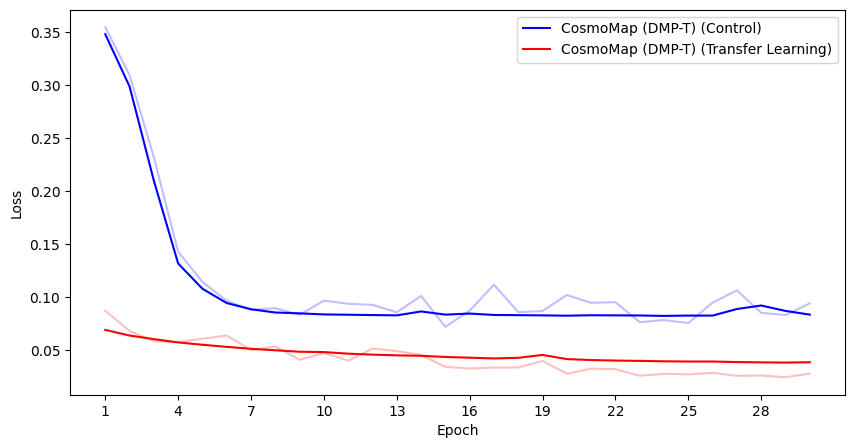

In [2]:
# Mounting drive,
drive.mount('/content/drive', force_remount=True)

# Logging files paths,
clog_file_path = f"/content/drive/My Drive/Colab Notebooks/CosmoMap-PM1.6/{MAPPING}-v{CONTROL_MODEL}-CHECKPOINTS/{MAPPING}-v{CONTROL_MODEL}-LOGGING.csv"
tlog_file_path = f"/content/drive/My Drive/Colab Notebooks/CosmoMap-PM1.6/{MAPPING}-v{TRANSFER_MODEL}-CHECKPOINTS/{MAPPING}-v{TRANSFER_MODEL}-LOGGING.csv"

# Extracting validation losses,
epochs = []
validation_losses_control = []
training_losses_control = []
with open(clog_file_path, mode="r") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
      validation_losses_control.append(round(float(row["Validation Loss"]), 4))
      training_losses_control.append(round(float(row["Training Loss"]), 4))
      epochs.append(row["Epoch"])

validation_losses_transfer = []
training_losses_transfer = []
with open(tlog_file_path, mode="r") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
      validation_losses_transfer.append(round(float(row["Validation Loss"]), 4))
      training_losses_transfer.append(round(float(row["Training Loss"]), 4))

# Plotting validation loss vs epoch,
fig, axes = plt.subplots(figsize=(10, 5))
plt.plot(epochs, validation_losses_control, label="CosmoMap (DMP-T) (Control)", color="blue")
plt.plot(epochs, training_losses_control, color="blue", alpha=0.25)
plt.plot(epochs, validation_losses_transfer, label="CosmoMap (DMP-T) (Transfer Learning)", color="red")
plt.plot(epochs, training_losses_transfer, color="red", alpha=0.25)
step = max(1, len(epochs) // 10)
plt.xticks(ticks=np.arange(0, len(epochs), step), labels=epochs[::step])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Basic Visualisation

Mounted at /content/drive


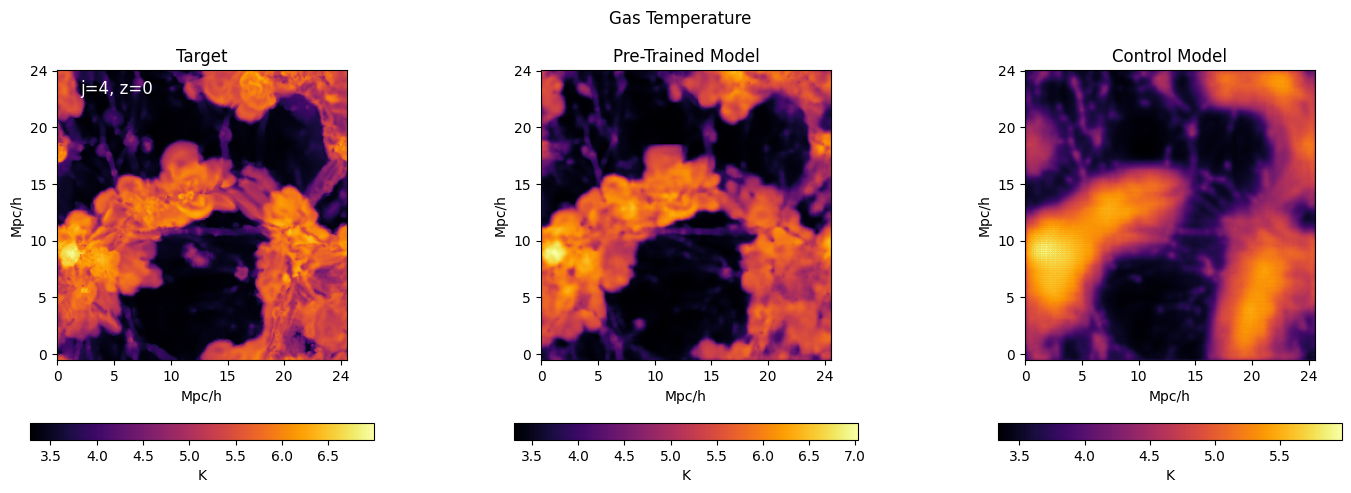

In [52]:
# Parameters,
PIXEL_SCALE = 25/256 # Mpc/h
i = 4

# Creating figure,
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mounting drive,
drive.mount('/content/drive', force_remount=True)

# Loading data,
pred_c = np.load(f"/content/drive/My Drive/Colab Notebooks/CosmoMap-PM1.6/predictions({MAPPING})_{CONTROL_MODEL}.npy")
pred = np.load(f"/content/drive/My Drive/Colab Notebooks/CosmoMap-PM1.6/predictions({MAPPING})_{TRANSFER_MODEL}.npy")
target = np.load(f"/content/drive/My Drive/Colab Notebooks/CosmoMap-PM1.6/targets({MAPPING})_{TRANSFER_MODEL}.npy")

"""PLOTTING"""

# Setting titles,
axes[0].set_title(f"Target")
axes[1].set_title(f"Pre-Trained Model")
axes[2].set_title(f"Control Model")

# Plotting images,
fig.suptitle("Gas Temperature")
img_target = axes[0].imshow(np.log10(target[i]), cmap="inferno")
cbar1 = fig.colorbar(img_target, ax=axes[0], orientation="horizontal", shrink=0.7, label=UNITS)
axes[0].text(20, 20, f"j={i}, z={0}", color="white", fontsize=12)
img_pred = axes[1].imshow(np.log10(pred[i]), cmap="inferno")
cbar2 = fig.colorbar(img_pred, ax=axes[1], orientation="horizontal", shrink=0.7, label=UNITS)
img_pred_c = axes[2].imshow(np.log10(pred_c[i]), cmap="inferno")
cbar3 = fig.colorbar(img_pred_c, ax=axes[2], orientation="horizontal", shrink=0.7, label=UNITS)

# Setting xticks, yticks and labels,
for ax in axes:

      xticks = ax.get_xticks()[1:-1]
      yticks = ax.get_yticks()[1:-1]

      # Converting into physical units,
      xtick_labels = [f"{x * PIXEL_SCALE:.0f}" for x in xticks]
      ytick_labels = [f"{y * PIXEL_SCALE:.0f}" for y in yticks]

      # Inverting y-axis ticks,
      ytick_labels = ytick_labels[::-1]

      # Setting ticks,
      ax.set_xticks(xticks)
      ax.set_xticklabels(xtick_labels)
      ax.set_yticks(yticks)
      ax.set_yticklabels(ytick_labels)

      # Setting labels,
      ax.set_xlabel("Mpc/h")
      ax.set_ylabel("Mpc/h")

# Showing plot,
plt.tight_layout()
plt.show()

# LPE Analysis

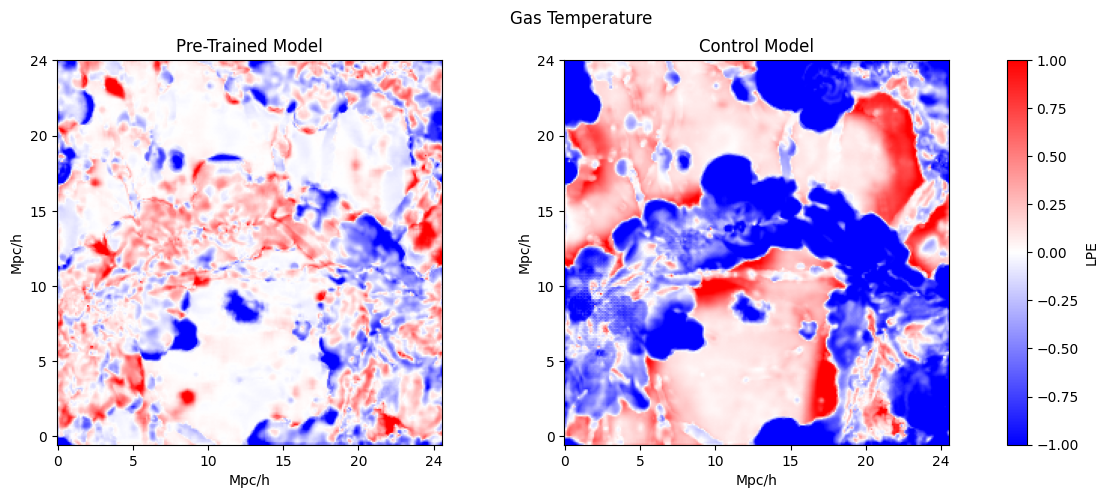

In [53]:
# Specifiy jth sample,
i = 4
PIXEL_SCALE = 25/256 # Mpc/h

def plot_lpe():

    # Creating figure,
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle("Gas Temperature")

    # Plotting LPE (transfer learning),
    img_LPE = np.log10(pred[i]/target[i])
    img1 = axes[0].imshow(img_LPE, cmap="bwr", vmin=-1, vmax=1)
    axes[0].set_title("Pre-Trained Model")

    # Plotting LPE (control),
    img_LPE = np.log10(pred_c[i]/target[i])
    img2 = axes[1].imshow(img_LPE, cmap="bwr", vmin=-1, vmax=1)
    axes[1].set_title("Control Model")

    # Shared colourbar,
    cbar = fig.colorbar(img2, ax=axes.ravel().tolist(), orientation="vertical", label="LPE")

    # Updating xticks and yticks,
    for ax in axes:

      xticks = ax.get_xticks()[1:-1]
      yticks = ax.get_yticks()[1:-1]

      # Converting into physical units,
      xtick_labels = [f"{x * PIXEL_SCALE:.0f}" for x in xticks]
      ytick_labels = [f"{y * PIXEL_SCALE:.0f}" for y in yticks]

      # Inverting y-axis ticks,
      ytick_labels = ytick_labels[::-1]

      # Setting ticks,
      ax.set_xticks(xticks)
      ax.set_xticklabels(xtick_labels)
      ax.set_yticks(yticks)
      ax.set_yticklabels(ytick_labels)

      # Setting labels,
      ax.set_xlabel("Mpc/h")
      ax.set_ylabel("Mpc/h")

    # Displaying plot,
    plt.show()

# Plotting,
plot_lpe()

# Metric Analysis

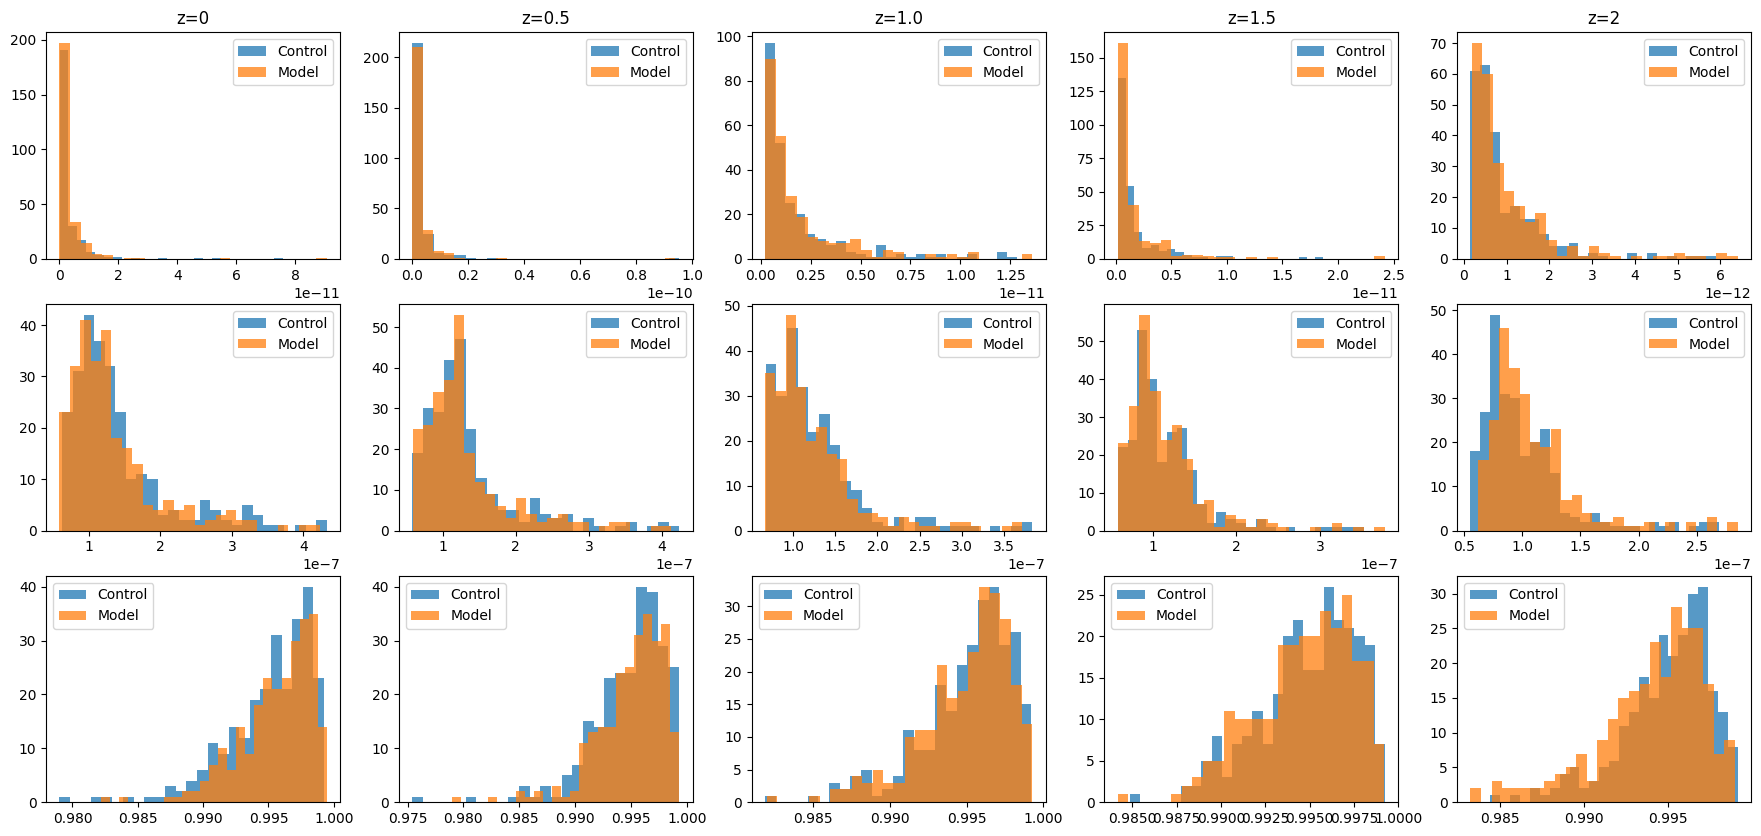

In [ ]:
def MSE(target, prediction, control_prediction):

  # Creating lists,
  mse_list_c = []
  mse_list = []

  # Looping all slices,
  for i in range(target.shape[0]):

    # Computing NMSE,
    mse_c = sklearn.metrics.mean_squared_error(control_prediction[i], target[i])
    mse = sklearn.metrics.mean_squared_error(prediction[i], target[i])

    # Appending,
    mse_list_c.append(mse_c)
    mse_list.append(mse)

  return np.array(mse_list_c), np.array(mse_list)

def MAE(target, prediction, control_prediction):

  # Creating lists,
  mae_list_c = []
  mae_list = []

  # Looping all slices,
  for i in range(target.shape[0]):

    # Computing MAE,
    mae_c = sklearn.metrics.mean_absolute_error(control_prediction[i], target[i])
    mae = sklearn.metrics.mean_absolute_error(prediction[i], target[i])

    # Appending,
    mae_list_c.append(mae_c)
    mae_list.append(mae)

  return np.array(mae_list_c), np.array(mae_list)

def SSIM(target, prediction, control_prediction):

  # Creating lists,
  ssim_list_c = []
  ssim_list = []

  # Looping all slices,
  for i in range(target.shape[0]):

    # Computing SSIM,
    data_range = target[i].max() - target[i].min()
    ssim_c = skimage.metrics.structural_similarity(control_prediction[i], target[i], data_range=data_range)
    ssim = skimage.metrics.structural_similarity(prediction[i], target[i], data_range=data_range)

    # Appending,
    ssim_list_c.append(ssim_c)
    ssim_list.append(ssim)

  return np.array(ssim_list_c), np.array(ssim_list)

# Creating plot,
fig, axes = plt.subplots(3, 5, figsize=(22, 10))

# Creating a dictionary to hold the metrics,
metrics_dict = {"Control":[], "Model":[]}

# Plotting everything,
for j, redshift in enumerate(Ne_dict.keys()):

  # Extracting key,
  key = list(Ne_dict.keys())[j]

  # Creating titles,
  axes[0, j].set_title(f"z={redshift}")

  # Calculating MSE,
  mse_c, mse = MSE(target=Ne_dict[key]["Target"], prediction=Ne_dict[key]["Model"], control_prediction=Ne_dict[key]["Control"])
  axes[0, j].hist(mse_c, bins=25, alpha=0.75, label="Control")
  axes[0, j].hist(mse, bins=25, alpha=0.75, label="Model")
  axes[0, j].legend()

  # Calculating MAE,
  mae_c, mae = MAE(target=Ne_dict[key]["Target"], prediction=Ne_dict[key]["Model"], control_prediction=Ne_dict[key]["Control"])
  axes[1, j].hist(mae_c, bins=25, alpha=0.75, label="Control")
  axes[1, j].hist(mae, bins=25, alpha=0.75, label="Model")
  axes[1, j].legend()

  # Calculating SSIM,
  ssim_c, ssim = SSIM(target=Ne_dict[key]["Target"], prediction=Ne_dict[key]["Model"], control_prediction=Ne_dict[key]["Control"])
  axes[2, j].hist(ssim_c, bins=25, alpha=0.75, label="Control")
  axes[2, j].hist(ssim, bins=25, alpha=0.75, label="Model")
  axes[2, j].legend()

  # Computing metrics,
  metrics_dict["Control"].append([np.mean(mse_c), np.mean(mae_c), np.mean(ssim_c)])
  metrics_dict["Model"].append([np.mean(mse), np.mean(mae), np.mean(ssim)])

plt.show()